# Volume 4: Finite Difference Method
    Benj McMullin
    Math 436
    11/2/2023

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

In [2]:
%matplotlib inline

# Problem 1

Let $u(x) = sin((x + \pi)^2 - 1)$. Use (1.3) - (1.6) to approximate $\frac{1}{2}
u'' − u'$ at the grid points where $a = 0$, $b = 1$, and $n = 10$. Graph the result.

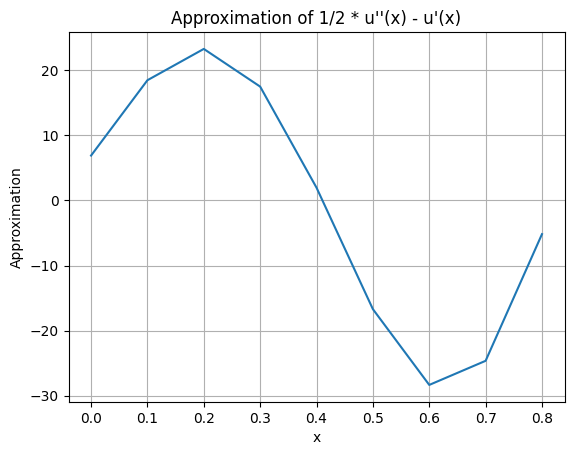

In [15]:
# Define givens
a = 0
b = 1
n = 10
u = lambda x: np.sin((x + np.pi) ** 2 - 1)
u_v = np.vectorize(u)
h = (b - a) / n

# Make the matrix A which is a Diagonally Dominant Matrix
diag = np.diag(np.ones(n + 1) * -1) + np.diag(np.ones(n - 1), 2)
A = diag[:-2]

# Define the grid points
x = np.linspace(a, b, n + 1)
u_val = u_v(x)

# Calculate u'(xi) using the centered difference method (equation 8.3)
u_prime = (1 / (2 * h)) * A @ u_val[: None]

# Solve the linear system for u''(xi)
A = np.diag(np.ones(n + 1)) + np.diag(np.ones(n  -1), 2) + np.diag(np.ones(n) * -2, 1)
A = A[:-2]
u_double_prime = (1 / (h ** 2)) * A @ u_val[: None]

# Calculate 1/2 * u''(xi) - u'(xi)
result = 0.5 * u_double_prime - u_prime

# Plot the result
plt.plot(x[:-2], result)
plt.title('Approximation of 1/2 * u\'\'(x) - u\'(x)')
plt.xlabel('x')
plt.ylabel('Approximation')
plt.grid(True)
plt.show()

# Problem 2

Equation (1.7) is the singularly perturbed boundary value problem
\begin{align*}
	&{ } \varepsilon u''(x)-u(x)'= f(x), \quad x \in (0,1), \\
	&{ } u(0) = \alpha, \quad u(1) = \beta.
\end{align*}

Use equation (1.9) to solve the singularly perturbed BVP (1.7) on $[0,1]$ with $\varepsilon = 1/10, f(x) = -1, \alpha=1,$ and $\beta=3$ on a grid with $n=30$ subintervals. Graph the solution. This BVP is called singularly perturbed because of the location of the parameter $\varepsilon$. For $\varepsilon=0$ the ODE has a drastically different character - it then becomes first order, and can no longer support two boundary conditions.

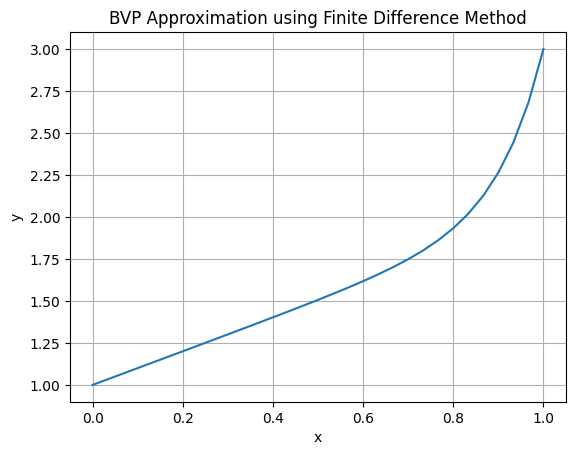

In [17]:
# Initialize the given values
e = .1
alpha = 1
beta = 3
n = 30
f = lambda x: -1 * np.ones_like(x)
h = 1 / n

# Make the calculations for the finite difference approximation
# but only for the interior points, not the first and last conditions
x_val = np.linspace(0, 1, n + 1)
solution = f(x_val[1:-1])

# Adjust the first and last values
solution[0] -= alpha * (e + h / 2) / (h ** 2)
solution[-1] -= beta * (e - h / 2) / (h ** 2)

# Make the matrix
diag = (np.diag(np.ones(n - 1) * (-2 * e)) + np.diag(np.ones(n - 2) * (e + h / 2), -1)  + np.diag(np.ones(n - 2) * (e - h / 2), 1))/(h ** 2)

# Solve the system
result = np.linalg.solve(diag, solution)
result = np.concatenate(([alpha], result, [beta]))

# Plot
plt.plot(x_val, result)
plt.title('BVP Approximation using Finite Difference Method')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

# Problem 3

Implement a function `singular_bvp` to compute the finite difference solution to (1.7).
Using $n = 5 \times 2^0,5 \times 2^1, \dots ,5 \times 2^9$ subintervals, compute 10 approximate solutions.
Use these to visualize the $\mathcal{O}(h^2)$ convergence of the finite difference method from Problem 2 by producing a loglog plot of error against subinterval count; this will be similar to Figure 2, except with $\varepsilon=0.1$. 

To produce the plot, treat the approximation with $n = 5 \times 2^9$ subintervals as the "true solution", and measure the error for the other approximations against it. ote that, since the ratios of numbers of subintervals between approximations are multiples of 2, we can compute the $L_{\infty}$ error for the $n=5 \times 2^j$ approximation by using the `step` argument in the array slicing syntax:

    # best approximation; the vector has length 5*2^9+1
    sol_best = singular_bvp(eps,alpha,beta,f,5*(2**9))

    # approximation with 5*(2^j) intervals; the vector has length 5*2^j+1
    sol_approx = singular_bvp(eps,alpha,beta,f,5*(2**j))

    # approximation error; slicing results in a vector of length 5*2^j+1,
    #    which allows it to be compared
    error = np.max(np.abs(sol_approx - sol_best[::2**(9-j)]))


In [18]:
def singular_bvp(eps,alpha,beta,f,n):
    """
    Solves the singularly perturbed BVP (1.7) on the interval [0,1] using finite differences.
    
    Parameters:
        eps (float): the singular perturbation parameter of the BVP.
        alpha (float): the boundary value of u at x=0.
        beta (float): the boundary value of u at x=1.
        f (callable): the right-hand function of the BVP.
        n (int): the number of subintervals to use in the finite differences method.
        
    Returns:
        ((n+1,) ndarray): the approximated solution to the BVP, including the boundary points.
    """
    # Define the given values
    h = 1 / n

    # Make the calculations for the finite difference approximation
    x_val = np.linspace(0, 1, n + 1)
    solution = f(x_val[1:-1])

    # Adjust the first and last values
    solution[0] -= alpha * (e + h / 2) / (h ** 2)
    solution[-1] -= beta * (e - h / 2) / (h ** 2)

    # Make the matrix
    diag = (np.diag(np.ones(n - 1) * (-2 * e)) + np.diag(np.ones(n - 2) * (e + h / 2), -1)  + np.diag(np.ones(n - 2) * (e - h / 2), 1))/(h ** 2)

    # Solve for the results of the system
    result = np.linalg.solve(diag, solution)
    result = np.concatenate(([alpha], result, [beta]))

    return np.concatenate(([alpha], np.linalg.solve(diag, solution), [beta]))

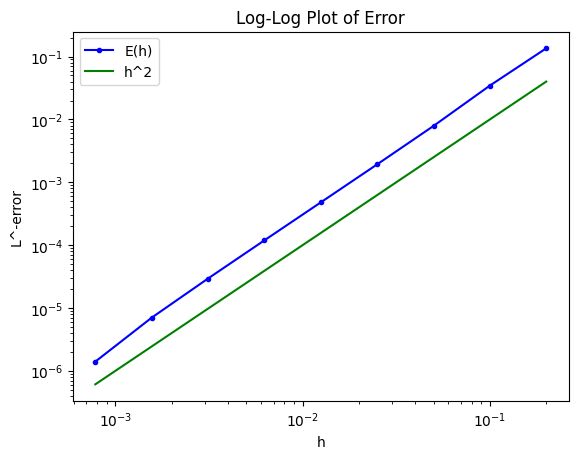

In [22]:
# Define the given values
sub_intv = 5 * np.array([2 ** i for i in range(10)])

# Define the function f
best_solution = singular_bvp(0.1, alpha, beta, f, 5 * (2 ** 9))

# Calculate the error
err = []
for i, sub in enumerate(sub_intv[:-1]):
    approx_solution = singular_bvp(0.1, alpha, beta, f, sub)

    err.append(np.max(np.abs(approx_solution - best_solution[::2 ** (9 - i)])))

# Plot the error
h = 1 / sub_intv[:-1]
plt.loglog(h, err, '.-b', label = 'E(h)')
plt.loglog(h, h ** 2, 'g', label = 'h^2')
plt.ylabel('L^-error')
plt.xlabel('h')
plt.title('Log-Log Plot of Error')
plt.legend()
plt.show()

# Problem 4

Extend your finite difference code to the case of a general second order linear BVP with boundary conditions:

\begin{align*}
	&{ } a_1(x)y''(x) +a_2(x)y'(x)+ a_3(x) y(x) = f(x), \quad x \in (a,b),\\
	&{ } y(a) = \alpha, \quad y(b) = \beta.
\end{align*}

Use your code to solve the boundary value problem

\begin{align*}
	\varepsilon y''(x) - 4(\pi - x^2)y(x) = \cos x, \\
	y(0) = 0, \quad y(\pi/2) = 1,
\end{align*}

for $\varepsilon = 0.1$ on a grid with $n=30$ subintervals. Plot your solution.

In [23]:
def bvp(a,b,alpha,beta,a1,a2,a3,f,n):
    """
    Computes the solution to the BVP:
        
        a1(x)y'' + a2(x)y' + a3(x)y = f
        y(a) = α, y(b) = β
        
    using finite differences.
    
    Parameters:
        a, b (float): the left and right boundary points.
        alpha (float): the boundary value of y at x=a.
        beta (float): the boundary value of y at x=b.
        f (callable): the right-hand function of the BVP.
        a1, a2, a3 (callable): the coefficient functions of the BVP.
        n (int): the number of subintervals to use in the finite differences method.
        
    Returns:
        ((n+1,) ndarray): the approximated solution to the BVP, including the boundary points.
    """
    # Define the given values
    x, h = np.linspace(a, b, n + 1, retstep = True)

    # Get our f(x) values
    f_val = f(x[1:-1])

    # Get our a(x) values
    a1_val = a1(x[1:-1])
    a2_val = a2(x[1:-1])
    a3_val = a3(x[1:-1])

    # Build the different parts of the matrix
    A = a1_val[1:] - a2_val[1:] * (h / 2)
    B = -2 * a1_val + a3_val * (h ** 2)
    C = a1_val[:-1] + a2_val[:-1] * (h / 2)

    # Build the matrix
    diagonal1 = np.diag(A, -1)
    diagonal2 = np.diag(B)
    diagonal3 = np.diag(C, 1)
    diagonal = (diagonal1 + diagonal2 + diagonal3) / h ** 2
    
    # Adjust the first and last values
    f_val[0] -= alpha * ((a1(a) - a2(a) * (h / 2)) / (h ** 2))
    f_val[-1] -= beta * (a1_val[-1] / (h ** 2) + a2_val[-1] / (2 * h))

    solution = np.linalg.solve(diagonal, f_val)

    return np.concatenate(([alpha], solution, [beta]))

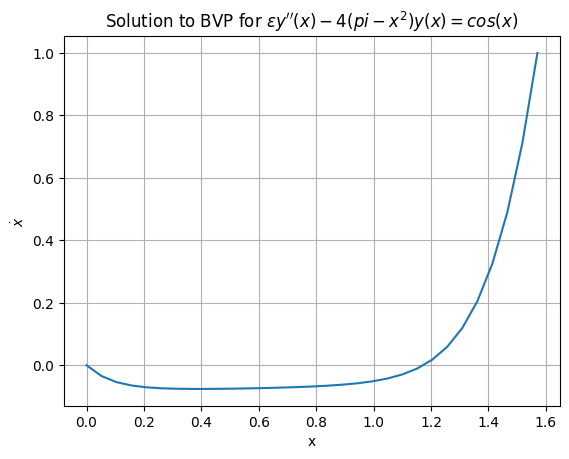

In [27]:
# Define the given values
a = 0
b = np.pi / 2
alpha = 0
beta = 1
n = 30
epsilon = .1

# Define the functions
x = np.linspace(a, b, n + 1)
a1 = lambda x: epsilon * np.ones_like(x)
a2 = lambda x: np.zeros_like(x)
a3 = lambda x: -4 * (np.pi - x ** 2)
f = lambda x: np.cos(x)

# Solve the system
solution = bvp(a, b, alpha, beta, a1, a2, a3, f, n)

# Plot the solution
plt.plot(x, solution)
plt.title(r'Solution to BVP for $\varepsilon y^{\prime\prime}(x) - 4(pi - x^2)y(x) = cos(x)$')
plt.xlabel('x')
plt.ylabel('$\dot{x}$')
plt.grid(True)
plt.show()

# Problem 5

Numerically solve the boundary value problem

\begin{align*}
	\varepsilon y''(x) + xy'(x) = -\varepsilon \pi^2 \cos(\pi x) - \pi x \sin(\pi x), \\
	y(-1) = -2, \quad y(1) = 0,
\end{align*}

for $\varepsilon = 0.1, 0.01,$ and $0.001$. Use a grid with $n=150$ subintervals. Plot your solutions.

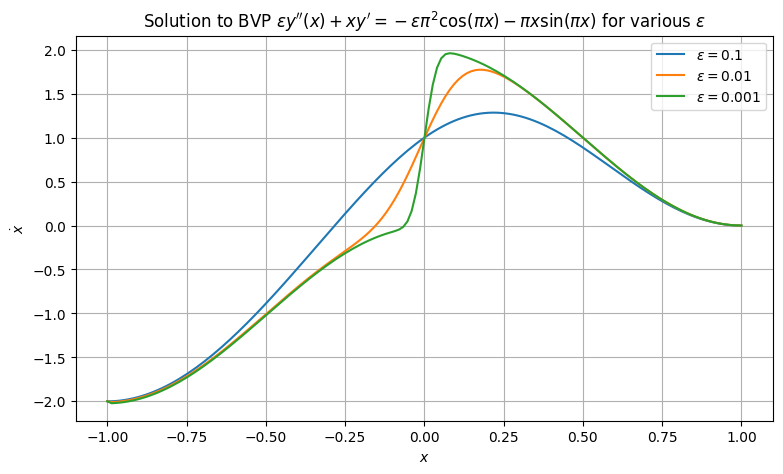

In [28]:
# Define the given values
a = -1
b = 1
alpha = -2
beta = 0
n = 150
epsilon = [0.1, 0.01, 0.001]

# Define the functions
x = np.linspace(a, b, n + 1)
plt.figure(figsize=(9, 5), dpi = 100)

# Iterate through the epsilons and plot the solutions
for e in epsilon:

    # Define the functions
    a1 = lambda x: e * np.ones_like(x)
    a2 = lambda x: x
    a3 = lambda x: np.zeros_like(x)
    f = lambda x: -e * np.pi ** 2 * np.cos(np.pi * x) - np.pi * x * np.sin(np.pi * x)

    # Solve the system
    solution = bvp(a, b, alpha, beta, a1, a2, a3, f, n)
    plt.plot(x, solution, label = rf'$\varepsilon = {e}$')

# Plot the solution
plt.title(r"Solution to BVP $\varepsilon y^{\prime\prime}(x) + xy^{\prime} = -\varepsilon \pi^{2}\cos(\pi x) - \pi x \sin(\pi x)$ for various $\varepsilon$")
plt.xlabel('$x$')
plt.ylabel('$\dot{x}$')
plt.legend()
plt.grid(True)
plt.show()

# Problem 6

Numerically solve the boundary value problem

\begin{align*}
	(\varepsilon +x^2)y''(x) + 4xy'(x) + 2y(x) = 0, \\
	y(-1) = 1/(1+\varepsilon), \quad y(1) = 1/(1+\varepsilon),
\end{align*}

for $\epsilon = 0.05$ and $0.02$. Use a grid with $n=150$ subintervals. Plot your solutions.

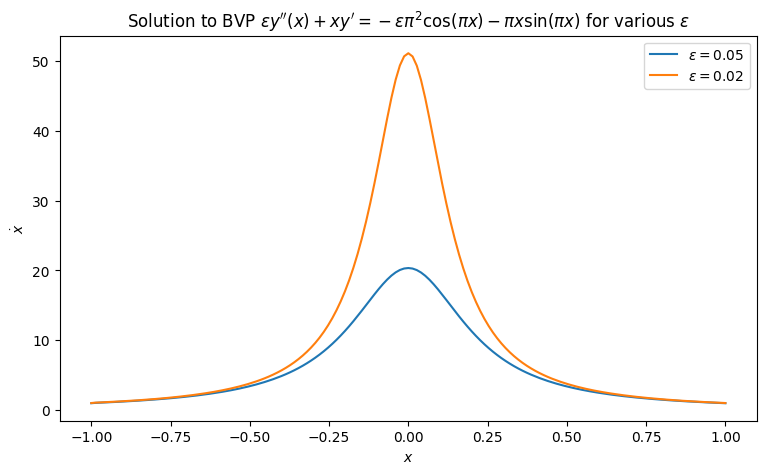

In [30]:
# Define the given values
a = -1
b = 1
n = 150
epsilon = [0.05, 0.02]

# Define the functions
x = np.linspace(a, b, n + 1)
plt.figure(figsize=(9, 5), dpi = 100)

# Iterate through the epsilons and plot the solutions
for e in epsilon:
    alpha = 1 / (1 + e)
    beta = 1 / (1 + e)

    # Define the functions
    a1 = lambda x: e + x ** 2
    a2 = lambda x: 4 * x
    a3 = lambda x: 2 * np.ones_like(x)
    f = lambda x: np.zeros_like(x)

    # Solve the system
    sol = bvp(a, b, alpha, beta, a1, a2, a3, f, n)
    plt.plot(x, sol, label = rf'$\varepsilon = {e}$')

# Plot the solution
plt.title(r"Solution to BVP $\varepsilon y^{\prime\prime}(x) + xy^{\prime} = -\varepsilon \pi^{2}\cos(\pi x) - \pi x \sin(\pi x)$ for various $\varepsilon$")
plt.xlabel('$x$')
plt.ylabel('$\dot{x}$')
plt.legend()
plt.show()